In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from scipy import stats

In [7]:
ratings.sort_values(by='movieId', inplace=True)
ratings.drop(columns=['timestamp', 'userId'], inplace=True)
ratings.set_index('movieId', inplace=True)

### Group Ratings by Title
Show average rating for each movie

In [18]:
title_avg = movie_ratings.groupby('title').rating.mean()
title_avg.sort_values().mean()

3.1285621874242486

In [19]:
country_scores = movie_ratings.groupby('language').rating.mean()

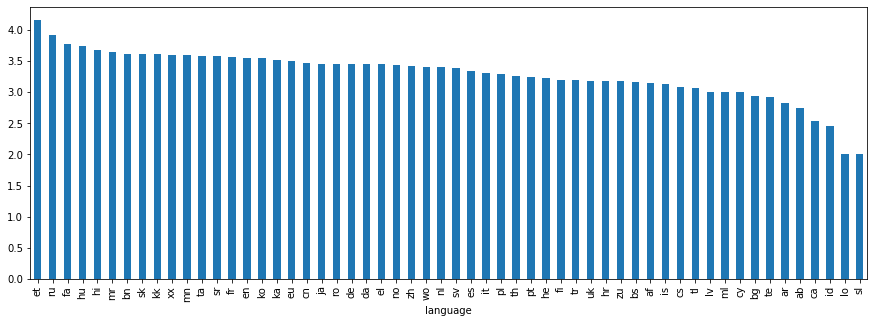

In [20]:
country_scores.sort_values(ascending=False).plot.bar(figsize=(15,5))

## Clean Data
Remove and reorder columns.

In [23]:
usecols=['budget', 'genres', 'original_language', 
         'production_companies', 'production_countries', 'release_date', 
         'revenue', 'runtime', 'spoken_languages', 'title', 'vote_average', 'vote_count']

used_dtypes = {
    "genres": object, 
    "original_language": str, 
    "production_companies": object,  
    "production_countries": object, 
    "release_date": str, 
    "spoken_languages": object, 
    "title": str, 
    "vote_average": float,
    "vote_count": float
}

movies = pd.read_csv('../data/movies_metadata.csv', dtype=used_dtypes, usecols=usecols)

In [17]:
used_dtypes = {
    "budget": int, "genres": object, 
    "original_language": str, 
    "production_companies": object,  
    "production_countries": object, 
    "release_date": str, 
    "revenue": int, 
    "runtime": int,
    "spoken_languages": object, 
    "title": str, 
    "vote_average": float,
    "vote_count": float
}

used_dtypes

{'budget': int,
 'genres': object,
 'original_language': str,
 'production_companies': object,
 'production_countries': object,
 'release_date': str,
 'revenue': int,
 'runtime': int,
 'spoken_languages': object,
 'title': str,
 'vote_average': float,
 'vote_count': float}

In [15]:
movies.head(2)

,budget,genres,original_language,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0


In [6]:
movies.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [37]:
# Re-order columns
movies = movies[['id','imdb_id','title','budget','genres','original_language','production_countries','release_date','revenue','runtime','status','vote_average','vote_count']]

# Update data types
movies = movies.convert_dtypes()
# Remove irregular ids
movies.drop(movies.id.loc[movies.id.str.contains('-')].index, inplace=True)
# Convert data types
# movies = movies.astype({"id": 'int', "budget": 'int'})
movies.release_date = pd.to_datetime(movies.release_date, format='%Y-%m-%d', errors='coerce')

# Drop zeros for revenue
movies.drop(movies[movies.revenue == 0].index, inplace=True)
# Drop zeros for runtime
movies.drop(movies[movies.runtime == 0].index, inplace=True)

# Replace single quotes with double and read as JSON
movies.genres = movies.genres.apply(lambda a: json.loads(a.replace("'", "\"")))
movies.genres.fillna('', inplace=True)

movies.head(2)

,id,imdb_id,title,budget,genres,original_language,production_countries,release_date,revenue,runtime,status,vote_average,vote_count
0,862,tt0114709,Toy Story,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81,Released,7.7,5415
1,8844,tt0113497,Jumanji,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104,Released,6.9,2413


In [5]:
# Drop missing values
# movies.production_country.dropna(inplace=True)
# movies.production_country.loc[1][:38] #.replace("',", "'},").replace(", '", ", {'")
# movies.production_country.apply(lambda b: json.loads(b.replace("'", "\"")))

In [65]:
movies.describe()

,revenue,runtime,vote_average,vote_count
count,7.387000e+03,7381.000000,7387.000000,7387.000000
mean,6.895836e+07,108.017884,6.220847,560.805063
std,1.465902e+08,20.720908,1.023875,1107.186386
min,1.000000e+00,11.000000,0.000000,0.000000
25%,2.403817e+06,94.000000,5.700000,41.000000
50%,1.692814e+07,104.000000,6.300000,161.000000
75%,6.763730e+07,118.000000,6.900000,542.000000
max,2.787965e+09,338.000000,10.000000,14075.000000


In [66]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7390 entries, 0 to 45422
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    7390 non-null   string        
 1   imdb_id               7390 non-null   string        
 2   title                 7387 non-null   string        
 3   budget                7390 non-null   string        
 4   genres                7390 non-null   object        
 5   original_language     7390 non-null   string        
 6   production_countries  7387 non-null   string        
 7   release_date          7386 non-null   datetime64[ns]
 8   revenue               7387 non-null   Int64         
 9   runtime               7381 non-null   Int64         
 10  status                7385 non-null   string        
 11  vote_average          7387 non-null   float64       
 12  vote_count            7387 non-null   Int64         
dtypes: Int64(3), date

&nbsp;
## Revenue & Runtime
Graph showing the revenue made on the movies vs the duration of the movie.

In [86]:
'Percentage ratings zero: '+str(len(movies.loc[movies.revenue == 0]) / len(movies) * 100)+'%'

'Percentage ratings zero: 83.6988320172448%'

In [87]:
'Percentage runtime zero: '+str(len(movies[movies.runtime == 0]) / len(movies) * 100)+'%'

'Percentage runtime zero: 3.426962584959198%'

In [104]:
# Get percentage of missing values
missing_value_cnt = movies.isnull().sum().sum()
total_cells = np.product(movies.shape)

'Percentage NaN: '+str((missing_value_cnt / total_cells) *100)+'%'

'Percentage NaN: 0.08688383960583332%'

In [100]:
# Remove NaNs, how many would be removed
movies.revenue.shape[0] - movies.revenue.dropna().shape[0]

3

In [53]:
# Drop missing values
# movies.revenue.dropna(inplace=True)

**If there is no value for either the runtime nor revenue, or is zero, it is likely that the value does exist but was not recorded. Dropping these rows seems to be the best option here. Almost all films make revenue and how can a movie have no runtime? Removing the zero rows will increase data quality.**

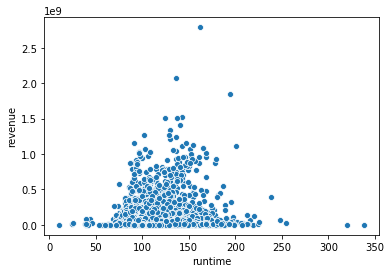

In [4]:
sns.scatterplot(x='runtime', y='revenue', data=movies)

### Get Unique Genres for Dropdown Menu

In [38]:
# Get each genre of each row and write to list
def get_unique(row):
    for i in row:
        return i['name']

# Save to Series to get list of genres
genre_list = pd.Series(list(map(get_unique, movies.genres))).unique()

In [6]:
genre_list

array(['Animation', 'Adventure', 'Comedy', 'Action', 'Family', 'History',
       'Drama', 'Crime', 'Fantasy', 'Science Fiction', 'Music', 'Horror',
       'Documentary', 'Romance', 'Mystery', 'Thriller', 'War', 'Western',
       None, 'Foreign', 'TV Movie'], dtype=object)

In [8]:
# Turn JSON into list of genres
def make_list(row):
    j=[]
    for i in row:
        j.append(i['name'])
    return j
    
# Save to Series to get list of genres
movies.genres = pd.Series(list(map(make_list, movies.genres)))

In [9]:
movies.head()

,id,imdb_id,title,budget,genres,original_language,production_countries,release_date,revenue,runtime,status,vote_average,vote_count
0,862,tt0114709,Toy Story,30000000,"[Animation, Comedy, Family]",en,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81,Released,7.7,5415
1,8844,tt0113497,Jumanji,65000000,"[Adventure, Fantasy, Family]",en,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104,Released,6.9,2413
3,31357,tt0114885,Waiting to Exhale,16000000,[Comedy],en,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127,Released,6.1,34
4,11862,tt0113041,Father of the Bride Part II,0,"[Action, Crime, Drama, Thriller]",en,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911,106,Released,5.7,173
5,949,tt0113277,Heat,60000000,"[Action, Adventure, Thriller]",en,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818,170,Released,7.7,1886


In [44]:
picked_genre, picked_genre2 = 'Any', ''

picked_genre, picked_genre2 = '*', '*' if (picked_genre == 'Any') or (picked_genre2 == 'Any') else picked_genre

print(picked_genre + picked_genre2)

**
